In [1]:
from graphviz import Graph, Digraph
import matplotlib.pyplot as plt
import seaborn as sns
import pgmpy
%matplotlib inline

## Plate models

Plate models are useful when we model objects of the same type, or copies of objects, that share the same probabilistic model. 

For example, modeling multiple tosses of the same coin. The idea is that it represents a stack of identical plates (kind of like a for loop).

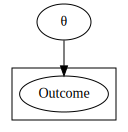

In [3]:
# Coin toss:
g = Digraph('G')
g.attr(compound='true')

with g.subgraph(name='clusterA') as a:
    a.node('Outcome')

g.edge('θ', 'Outcome')
g

Above, $\theta$ is not indeced by t, and thus its value is copied for each iteration.

We can also use plate models to make copies for several instances, e.g. for multiple students in the grade model. 

### Nested plates

I.e. nested indices

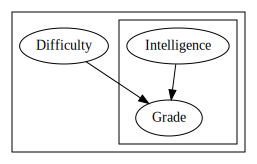

In [48]:
# Student model:
g = Digraph('G', engine='dot')
g.attr(compound='true')

with g.subgraph(name='clusterA') as a:
    a.node('Difficulty')
    with a.subgraph(name='clusterb') as b:
        b.edge('Intelligence', 'Grade')
        
g.edge('Difficulty', 'Grade')
g

**Overlapping plates:** E.g. Difficulty for course, Intelligence for student, Grade is in the overlap between the two

Models encode correlations across multiple objects, allowing ***collective inference***

Different "languages" for the nesting of plate models, with different tradeoffs in expressive power